# Breast Cancer Prediction Project

Welcome to the Breast Cancer Prediction project! 

## Objective

Our goal is to build a machine learning model that can accurately predict whether a tumor is **malignant (M)** or **benign (B)** based on a set of measurements.

We'll use the dataset `Cancer_Data.csv` 

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

##  Step 1: Load the Dataset

In [123]:
df = pd.read_csv('Cancer_data.csv')

this dataset is from breast cancer diagnosis records. it has data from `569` patients, where each row shows details from a test done on a tumor sample. the values include things like the `size`, `texture`, and `shape` of the cells.

it has `30` features (all numbers) that describe the tumor

there's one main column called diagnosis that tells whether the tumor was:

`M` = malignant (cancerous)

`B` = benign (non-cancerous)

the main goal is to use this data to predict whether a tumor is benign or malignant.

##  Step 2: Explore the Dataset

In [124]:
print("shape: ", df.shape)

print("\n columns: ", df.columns.tolist())

print("\n Info:")
print(df.info())

shape:  (569, 33)

 columns:  ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   te

In [125]:
print("\n diagnosis values:", df['diagnosis'].unique())

df.describe()


 diagnosis values: ['M' 'B']


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


we found that the dataset has 569 rows and 33 columns, and the target column is `diagnosis` with values 'M' and 'B'. the `id` column is just an identifier and `Unnamed: 32` is completely empty.

##  Step 3: Clean the Data

We'll remove any unnecessary columns and handle missing values.

Drop the 'Unnamed: 32' column and 'id'

In [126]:

df = df.drop(columns=['id', 'Unnamed: 32'])

print(df.shape)

(569, 31)


Saved `Cancer_Data_Cleaned.csv` seperately, although since its a small dataset, we'll be cleaning it during runtime only

##  Step 4: Visualize the Data

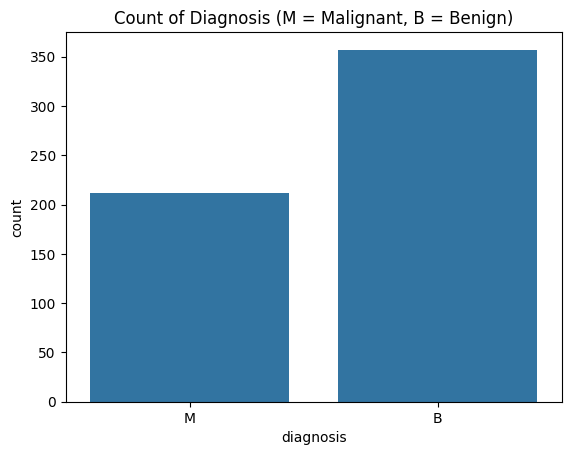

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='diagnosis', data=df)
plt.title("Count of Diagnosis (M = Malignant, B = Benign)")
plt.show()

the correlation matrix can only work after the diagnosis is encoded into `numerical data`, so that has been done in the preprocessing section.

##  Step 5: Preprocess the Data

In [128]:

df['diagnosis'] = df['diagnosis'].map({'M' : 1, 'B' : 0})
print("Encoded values in diagnosis:", df['diagnosis'].unique())


X = df.drop('diagnosis' , axis=1)
Y = df['diagnosis']

print(X.shape , Y.shape) #gives (569, 30) (569,) 

Encoded values in diagnosis: [1 0]
(569, 30) (569,)


Convert diagnosis column to `0`(benign) and `1` (malignant). \
Split features and labels (x and y). \
gives `(569, 30) (569,)`

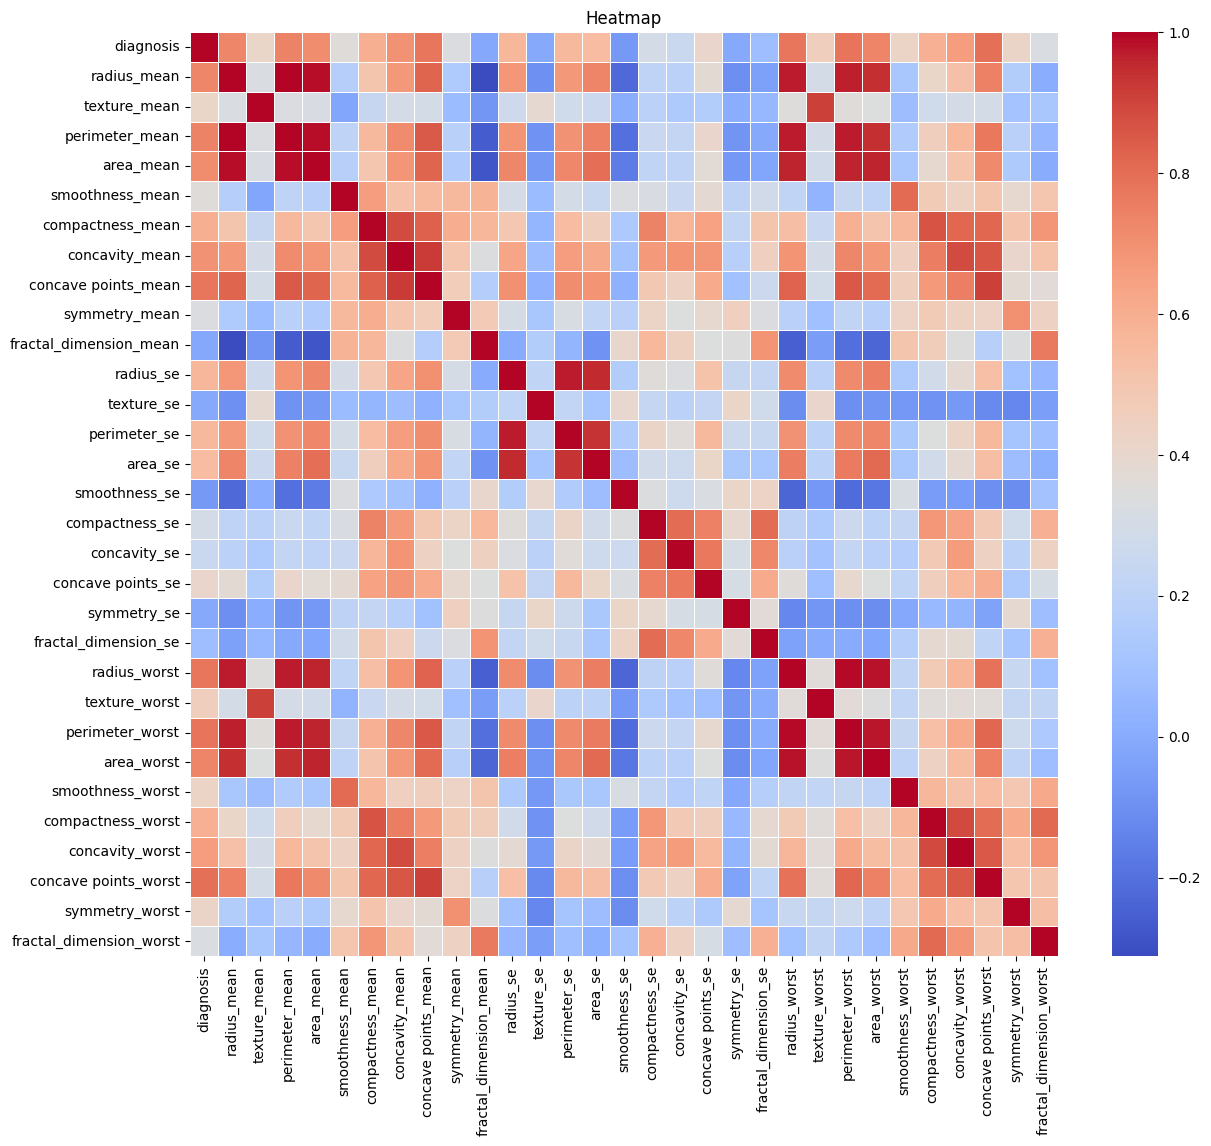

In [129]:
#corelation matrix
corr = df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap")
plt.show()

In [130]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape, "\n")


# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)

# re-scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train: (455, 30)
X_test: (114, 30)
Y_train: (455,)
Y_test: (114,) 

(455, 30)


`455` training samples and `114` testing samples: each with 30 features

Scaling the features to be all set to train the model

##  Step 6: Train a Machine Learning Model

In [131]:

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score


Using `pytorch` since tensorflow isnt suppported on python 3.13

In [132]:
Y_train_tensor = torch.tensor(Y_train.values, dtype=torch.float32).view(-1, 1)
Y_train_tensor = (Y_train_tensor >= 0.5).float()  # makes sure values are 0.0 or 1.0

Y_test_tensor = torch.tensor(Y_test.values, dtype=torch.float32).view(-1, 1)
Y_test_tensor = (Y_test_tensor >= 0.5).float()


`Tensor Conversion` - This block converts the Y_train and Y_test labels into PyTorch float tensors and ensures values are either 0.0 or 1.0 (binary), which is required for binary classification with a sigmoid output.

In [133]:
#defining model
class CancerNet(nn.Module):
    def __init__(self):
        super(CancerNet, self).__init__()
        self.fc1 = nn.Linear(30, 16)   
        self.fc2 = nn.Linear(16, 8)    
        self.out = nn.Linear(8, 1)    
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.out(x))
        return x
model = CancerNet()


`Model Defining` - Defines a simple neural network called `CancerNet` using PyTorch. It has 3 fully connected layers with `ReLU` activations and a final `sigmoid` for binary output. This model predicts if the tumor is malignant or benign.

In [134]:
#defining loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


`binary cross-entropy` - perfect for binary classification

`Adam` - helps adjust weights based on loss

In [135]:
# Training loop
epochs = 100

for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, Y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [10/100], Loss: 0.6745
Epoch [20/100], Loss: 0.6491
Epoch [30/100], Loss: 0.6159
Epoch [40/100], Loss: 0.5720
Epoch [50/100], Loss: 0.5219
Epoch [60/100], Loss: 0.4687
Epoch [70/100], Loss: 0.4158
Epoch [80/100], Loss: 0.3644
Epoch [90/100], Loss: 0.3148
Epoch [100/100], Loss: 0.2691


We can see the loss decreases every 10 epochs, thus we are assured the training is fine

In [136]:
# Using Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, Y_train)

log_preds = log_reg.predict(X_test_scaled)

from sklearn.metrics import classification_report, confusion_matrix
print("Logistic Regression Classification Report:")
print(classification_report(Y_test, log_preds))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, log_preds))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
[[70  1]
 [ 2 41]]


Logistic regression performs well and balanced. it hits `97%` accuracy and confusion matrix is nearly perfect.

##  Step 7: Evaluate the Model

In [137]:

with torch.no_grad():
    test_outputs = model(X_test_tensor)
    predicted = (test_outputs >= 0.5).float()  
# Accuracy
accuracy = accuracy_score(Y_test_tensor, predicted)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.9649


In [138]:
#saving the model
torch.save(model.state_dict(), 'cancer_model.pth')


Since the dataset is small and clean, we have an achieved accuracy over `95%` on the test set.

## `Finally`
Built a breast cancer classification model using `PyTorch` and `scikit-learn`. Achieved `96%` test accuracy with a neural network and `97%` with Logistic Regression on a well-processed medical dataset. Explored model benchmarking, data preprocessing, and evaluation